In [21]:
# !C:\Users\user\AppData\Local\Python\pythoncore-3.14-64\python.exe -m pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.3 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.3 MB 20.8 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 20.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 50.1 MB/s  0:00:00
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---------------------------------------- 7.1/7.1 MB 62.2 MB/s  0:00:00

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----------------- ---------------------- 3/7 [fonttools]
   -----------

In [16]:
# import sys
# sys.executable

'C:\\Users\\user\\AppData\\Local\\Python\\pythoncore-3.14-64\\python.exe'

In [23]:
# !pip install koreanize-matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 7.9/7.9 MB 69.7 MB/s  0:00:00


In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

plt.rc("axes", unicode_minus=False)

In [4]:
data = pd.read_csv('두레팜-01-2025-10-14-00시~2025-11-13-23시.csv')

In [5]:
data.columns

Index(['데이터 수신 시간', '운전 상태', '운전 모드', '재배 일자', 'CO2 평균값', '온도 평균값', '습도 평균값',
       '조도 평균값', 'CO2_1', '온도_1', '습도_1', '조도_1', 'CO2_2', '온도_2', '습도_2',
       '조도_2', 'CO2_3', '온도_3', '습도_3', '조도_3', 'CO2_4', '온도_4', '습도_4',
       '조도_4', 'CO2 제어방식', 'CO2 설정값1', 'CO2 설정값2', '온도 제어방식', '온도 설정값1',
       '온도 설정값2', '습도 제어방식', '습도 설정값1', '습도 설정값2', '조도 제어방식', '조도 설정값1',
       '조도 설정값2', 'CO2 릴레이동작', '난방 릴레이 동작', '냉방 릴레이 동작', '가습 릴레이 동작',
       '제습 릴레이 동작', '조명 릴레이 동작', '알람 릴레이 동작'],
      dtype='object')

In [20]:
df = data.copy()

In [21]:
# 날짜 컬럼 datetime으로 변환
df['데이터 수신 시간'] = pd.to_datetime(df['데이터 수신 시간'])
df = df.set_index('데이터 수신 시간').sort_index()

In [22]:
# 분석에 사용할 칼럼 추출
cols = ['온도 평균값', '습도 평균값', 'CO2 평균값']
df = df[cols]

In [23]:
df.head()

,온도 평균값,습도 평균값,CO2 평균값
데이터 수신 시간,,,
2025-10-14,22.6,90.8,369
2025-10-15,21.1,83.2,384
2025-10-16,21.4,86.1,392
2025-10-17,20.4,81.9,379
2025-10-18,21.4,84.2,395


In [24]:
# 숫자형으로 변환
df = df.apply(pd.to_numeric, errors='coerce')

In [25]:
# 일자별 평균
daily_mean = df.resample('D').mean()

In [26]:
daily_mean

,온도 평균값,습도 평균값,CO2 평균값
데이터 수신 시간,,,
2025-10-14,22.6,90.8,369.0
2025-10-15,21.1,83.2,384.0
2025-10-16,21.4,86.1,392.0
2025-10-17,20.4,81.9,379.0
2025-10-18,21.4,84.2,395.0
2025-10-19,20.2,80.8,387.0
2025-10-20,19.2,80.0,391.0
2025-10-21,17.0,71.2,370.0
2025-10-22,17.3,72.4,365.0


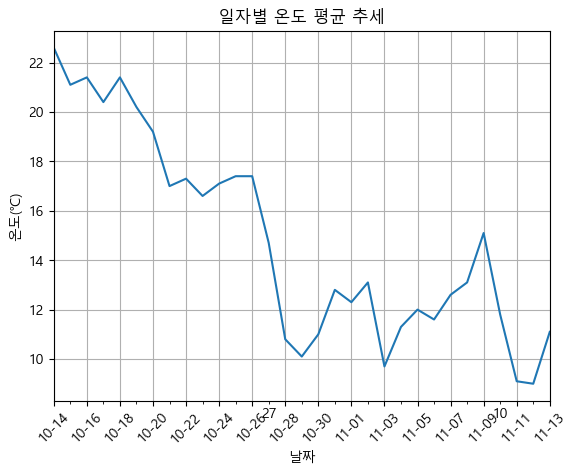

In [33]:
plt.figure()

daily_mean.index = pd.to_datetime(daily_mean.index)
daily_mean = daily_mean.sort_index()

daily_mean['온도 평균값'].plot()

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.title('일자별 온도 평균 추세')
plt.xticks(rotation=45)
plt.xlabel('날짜')
plt.ylabel('온도(℃)')
plt.grid(True)
plt.show()

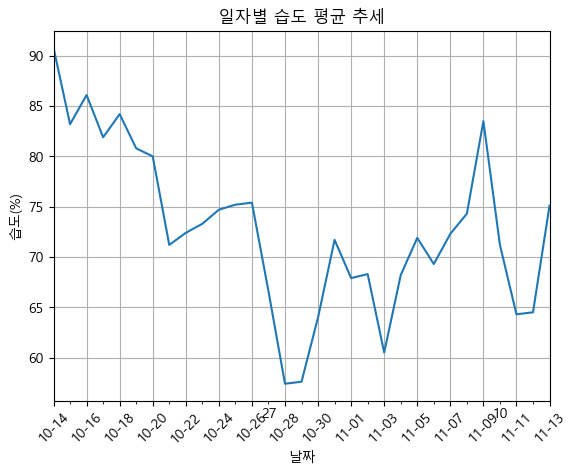

In [35]:
plt.figure()
daily_mean['습도 평균값'].plot()

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.title('일자별 습도 평균 추세')
plt.xticks(rotation=45)
plt.xlabel('날짜')
plt.ylabel('습도(%)')
plt.grid(True)
plt.show()

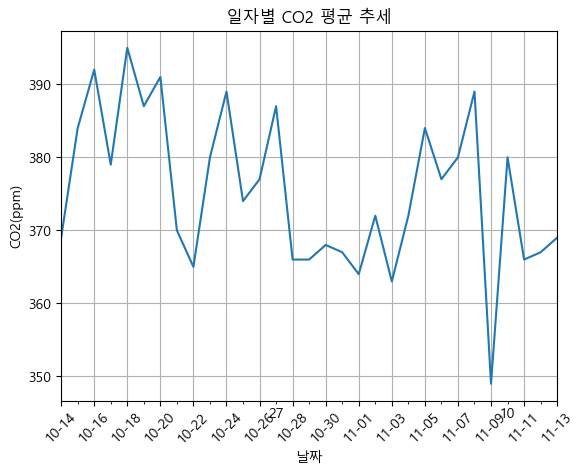

In [36]:
plt.figure()
daily_mean['CO2 평균값'].plot()

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.title('일자별 CO2 평균 추세')
plt.xticks(rotation=45)
plt.xlabel('날짜')
plt.ylabel('CO2(ppm)')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

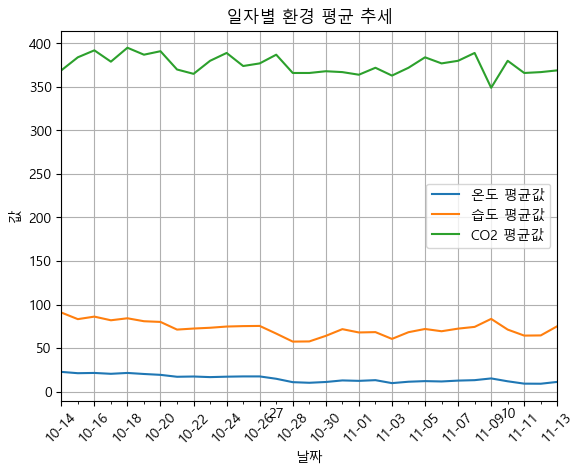

In [38]:
plt.figure()
daily_mean.plot()

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.title('일자별 환경 평균 추세')
plt.xticks(rotation=45)
plt.xlabel('날짜')
plt.ylabel('값')
plt.grid(True)
plt.show()